<a href="https://colab.research.google.com/github/ArifAygun/Magnimind-Jan2023-Assignments/blob/main/Office_Hour_Data_Exploration_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Handling with Variable Type Assignment & Submit**

## 2.2 Using the movie data, we have studied in this lesson. Complete the following tasks:

- Select a continuous and a categorical variable from the movie dataset and discuss the variable type of this variable. Discuss further in detail the type of selected continuous and categorical variables.
- Categorize a variable of your choice and assign a name to it
- Count the number of rows for each category

In [46]:
from pandas.io.formats import style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
pd.options.display.float_format = '{:2f}'.format
plt.rcParams['figure.dpi'] = 100

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('movies.csv')
df = pd.read_csv(file_path)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.100000,757074,333.130000,76.000000
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.000000,485820,126.460000,65.000000
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.300000,157606,138.120000,62.000000
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.200000,60545,270.320000,59.000000
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.200000,393727,325.020000,40.000000


In [49]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 12 entries, Rank to Metascore
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [50]:
#df.describe(include ='0')
df.describe(include='object')

,Title,Genre,Description,Director,Actors
count,1000,1000,1000,1000,1000
unique,999,207,1000,644,996
top,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,2,50,1,8,2


### 2.2.a. Select a continuous and a categorical variable from the movie dataset and discuss the variable type of this variable. 

In [51]:
variable_type = pd.Series(['continuous numerical - ordinal',
                           'string variable - nominal',
                           'categorical - nominal',
                           'string variable - nominal',
                           'categorical - nominal',
                           'categorical - nominal',
                           'numerical discrete - interval',
                           'discrete numerical - ratio',
                           'dicrete numerical - ordinal',
                           'continonus numerical - ordinal',
                           'continuous numerical - ratio',
                           'discrete numerical - ordinal'], index = df.dtypes.index)

In [52]:
df_dtype = pd.concat([df.dtypes, df.nunique(), round(df.nunique()*100/len(df)), variable_type], axis=1)
df_dtype.columns = ['data type', 'No. of categories', 'categories/sample ratio %', 'variable_type']
df_dtype

,data type,No. of categories,categories/sample ratio %,variable_type
Rank,int64,1000,100.000000,continuous numerical - ordinal
Title,object,999,100.000000,string variable - nominal
Genre,object,207,21.000000,categorical - nominal
Description,object,1000,100.000000,string variable - nominal
Director,object,644,64.000000,categorical - nominal
Actors,object,996,100.000000,categorical - nominal
Year,int64,11,1.000000,numerical discrete - interval
Runtime (Minutes),int64,94,9.000000,discrete numerical - ratio
Rating,float64,55,6.000000,dicrete numerical - ordinal
Votes,int64,997,100.000000,continonus numerical - ordinal


### 2.2.b. Categorize a variable of your choice and assign a name to it

In [53]:
df['Revenue Category'] = pd.cut(df['Revenue (Millions)'], bins=3, right=True, labels=['low', 'medium', 'high'])
#df['Revenue (Millions)'].value_counts(bins=3)
df['Revenue Category']

0      medium
1         low
2         low
3         low
4      medium
        ...  
995       NaN
996       low
997       low
998       NaN
999       low
Name: Revenue Category, Length: 1000, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [55]:
# example with range
binned_range = pd.cut(range(1,1000), bins=3, right=True, labels=['low', 'medium', 'high'])
binned_range


['low', 'low', 'low', 'low', 'low', ..., 'high', 'high', 'high', 'high', 'high']
Length: 999
Categories (3, object): ['low' < 'medium' < 'high']

### 2.2.c.Count the number of rows for each category

In [56]:
df['Revenue Category'].value_counts()

low       835
medium     34
high        3
Name: Revenue Category, dtype: int64

Metascore and Rating can be converted to discrete numerical

## 2.3. Is it possible to convert categorical variable into numerical one? If so, how can you make that?

In [61]:
d = dict(enumerate(df.Genre.astype('category').cat.categories))
df['Genre_discrete'] = df.Genre.astype('category').cat.codes

In [65]:
d

{0: 'Action',
 1: 'Action,Adventure',
 2: 'Action,Adventure,Biography',
 3: 'Action,Adventure,Comedy',
 4: 'Action,Adventure,Crime',
 5: 'Action,Adventure,Drama',
 6: 'Action,Adventure,Family',
 7: 'Action,Adventure,Fantasy',
 8: 'Action,Adventure,Horror',
 9: 'Action,Adventure,Mystery',
 10: 'Action,Adventure,Romance',
 11: 'Action,Adventure,Sci-Fi',
 12: 'Action,Adventure,Thriller',
 13: 'Action,Adventure,Western',
 14: 'Action,Biography,Crime',
 15: 'Action,Biography,Drama',
 16: 'Action,Comedy',
 17: 'Action,Comedy,Crime',
 18: 'Action,Comedy,Drama',
 19: 'Action,Comedy,Family',
 20: 'Action,Comedy,Fantasy',
 21: 'Action,Comedy,Horror',
 22: 'Action,Comedy,Mystery',
 23: 'Action,Comedy,Romance',
 24: 'Action,Comedy,Sci-Fi',
 25: 'Action,Comedy,Sport',
 26: 'Action,Crime,Drama',
 27: 'Action,Crime,Fantasy',
 28: 'Action,Crime,Mystery',
 29: 'Action,Crime,Sci-Fi',
 30: 'Action,Crime,Sport',
 31: 'Action,Crime,Thriller',
 32: 'Action,Drama,Family',
 33: 'Action,Drama,Fantasy',
 34: 'A

In [66]:
df['Genre_discrete']

0       11
1       85
2      195
3       92
4        7
      ... 
995    144
996    190
997    170
998     61
999    121
Name: Genre_discrete, Length: 1000, dtype: int16

In [67]:
df['Genre_discrete_categories'] = df['Genre_discrete'].map(d)

In [68]:
df['Genre_discrete'].nunique() == df.Genre.nunique

False

In [64]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Revenue Category,Genre_discrete,Genre_discrete_categories
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.100000,757074,333.130000,76.000000,medium,11,"Action,Adventure,Sci-Fi"
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.000000,485820,126.460000,65.000000,low,85,"Adventure,Mystery,Sci-Fi"
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.300000,157606,138.120000,62.000000,low,195,"Horror,Thriller"
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.200000,60545,270.320000,59.000000,low,92,"Animation,Comedy,Family"
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.200000,393727,325.020000,40.000000,medium,7,"Action,Adventure,Fantasy"


## 2.4. While continuous data is generally preferred over discrete data, please indicate circumstances where discrete is the preferred data type although continuous data is available for the same characteristic.

In classification problems, categorical data are used as they fit the classification techniques and method.

In regression problems, continuous data is required.

## 2.5. While continuous data is measured and attribute data is counted, there is sometimes confusion if some specific dataset should be considered continuous or attribute. Provide some examples of confusing datasets and your inference.

- While measuring time we think that it is hour, month, year, so it will be attribute data but in actually it is continuous data because it can be break into minutes, seconds like that. But we can convert it into attribute data.


- Another confusing dataset when we are talking about money, when we withdraw money from atm it comes like 1000, 2000, 250, 2475 but if we see our bank balance in our records online then we see the figures like 200.35, so it is continuous data because it has several infinite values so it is continuous data.


- Another confusing dataset is percentage data or we can say that derived data, how we will consider it continuous or attribute. It depends on source data what it is actually according to that % data is decided. For example number of students taking this class divided by total number of graduate students is attribute data because a student can not be 3.5, 4.5

# **3. Missing Values Assignment & Submit**



In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed, state-level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

## 3.1. Determine all the variable types and find the fraction of the missing values for each variable. Answer the following questions as you work through this challenge, and then paste a link to your Notebook.

In [140]:
import pandas as pd
import os

def file_locator(file_name):
  main_dir = os.getcwd()

  for dir, folder, files in os.walk(main_dir):
    for file in files:
      if file == file_name:
        file_path = os.path.join(dir,file)
  return file_path

file_path = file_locator('states_all.csv')
df = pd.read_csv(file_path)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000,208.000000,252.000000,207.000000,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000,215.000000,265.000000,209.000000,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000,210.000000,256.000000,211.000000,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000,208.000000,261.000000,202.000000,NaN


In [97]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 25 entries, PRIMARY_KEY to AVG_READING_8_SCORE
dtypes: float64(22), int64(1), object(2)
memory usage: 335.1+ KB


In [98]:
df_datatype = pd.concat([df.dtypes, df.nunique(),
                         round(df.nunique()*100/len(df), 2),
                         df.isnull().sum(),
                         round(df.isnull().sum()*100/len(df),2)],
                        axis=1)

In [99]:
df_datatype

,0,1,2,3,4
PRIMARY_KEY,object,1715,100.000000,0,0.000000
STATE,object,53,3.090000,0,0.000000
YEAR,int64,33,1.920000,0,0.000000
ENROLL,float64,1224,71.370000,491,28.630000
TOTAL_REVENUE,float64,1274,74.290000,440,25.660000
FEDERAL_REVENUE,float64,1275,74.340000,440,25.660000
STATE_REVENUE,float64,1251,72.940000,440,25.660000
LOCAL_REVENUE,float64,1275,74.340000,440,25.660000
TOTAL_EXPENDITURE,float64,1275,74.340000,440,25.660000
INSTRUCTION_EXPENDITURE,float64,1275,74.340000,440,25.660000


In [100]:
df_datatype.columns = ['data type', 'No. of categories', 'No. of categories %', 'missing values', 'missing values %']

In [101]:
df_datatype.columns

Index(['data type', 'No. of categories', 'No. of categories %',
       'missing values', 'missing values %'],
      dtype='object')

In [102]:
df_datatype.sort_values(by='missing values %', ascending=False, inplace=True)

In [103]:
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.270000,1153,67.230000
AVG_MATH_4_SCORE,float64,50,2.920000,1150,67.060000
AVG_MATH_8_SCORE,float64,57,3.320000,1113,64.900000
AVG_READING_4_SCORE,float64,43,2.510000,1065,62.100000
GRADES_1_8_G,float64,1020,59.480000,695,40.520000
GRADES_9_12_G,float64,1070,62.390000,644,37.550000
ENROLL,float64,1224,71.370000,491,28.630000
OTHER_EXPENDITURE,float64,1222,71.250000,491,28.630000
SUPPORT_SERVICES_EXPENDITURE,float64,1275,74.340000,440,25.660000
CAPITAL_OUTLAY_EXPENDITURE,float64,1275,74.340000,440,25.660000


In [104]:
df_datatype = df_datatype.loc[df_datatype['missing values']!=0]
df_datatype

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.270000,1153,67.230000
AVG_MATH_4_SCORE,float64,50,2.920000,1150,67.060000
AVG_MATH_8_SCORE,float64,57,3.320000,1113,64.900000
AVG_READING_4_SCORE,float64,43,2.510000,1065,62.100000
GRADES_1_8_G,float64,1020,59.480000,695,40.520000
GRADES_9_12_G,float64,1070,62.390000,644,37.550000
ENROLL,float64,1224,71.370000,491,28.630000
OTHER_EXPENDITURE,float64,1222,71.250000,491,28.630000
SUPPORT_SERVICES_EXPENDITURE,float64,1275,74.340000,440,25.660000
CAPITAL_OUTLAY_EXPENDITURE,float64,1275,74.340000,440,25.660000


In [105]:
df_datatype[df_datatype.index=='AVG_READING_8_SCORE']['data type']

AVG_READING_8_SCORE    float64
Name: data type, dtype: object

### 3.2 Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [106]:
# drop those variable with more than 50% missing value
df_datatype.iloc[np.where(df_datatype['missing values %']>50)]

,data type,No. of categories,No. of categories %,missing values,missing values %
AVG_READING_8_SCORE,float64,39,2.270000,1153,67.230000
AVG_MATH_4_SCORE,float64,50,2.920000,1150,67.060000
AVG_MATH_8_SCORE,float64,57,3.320000,1113,64.900000
AVG_READING_4_SCORE,float64,43,2.510000,1065,62.100000


In [107]:
columns_to_drop = df_datatype.iloc[np.where(df_datatype['missing values %'] > 50)].index

print(f""" columns, {columns_to_drop} can be dropped since more than 50% of data is missing, for the rest of variable, the missing value can be replaced by some values""")

 columns, Index(['AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE'],
      dtype='object') can be dropped since more than 50% of data is missing, for the rest of variable, the missing value can be replaced by some values


In [108]:
df.drop(columns_to_drop.to_list(), axis=1, inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,...,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,...,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,...,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,...,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,...,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df_datatype.drop(index=columns_to_drop, axis=0, inplace=True)

In [110]:
#keep the columns with at least 50% non-null values
# thresh should be int. it is optional but it cannot be combined with how. It require that many non-NA values.
df.dropna(axis='columns', thresh=round(len(df)/2), inplace=True)

In [111]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1224.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1224.000000,1275.000000,1542.000000,1632.000000,1632.000000,1632.000000,1632.000000,1020.000000,1071.000000,1632.000000
mean,2002.075219,917541.566176,9102044.929412,767779.864314,4223742.902745,4110522.156078,9206242.121569,4768010.484706,2682586.519216,429950.933824,903467.454902,17840.958495,68810.962010,69166.507966,68106.537377,58420.870711,577954.717647,282069.084967,913969.494485
std,9.568621,1066514.198574,11759620.227524,1146991.507325,5549734.818394,5489561.973467,11992791.012446,6300569.339670,3357214.499350,534789.311211,1329473.468334,30016.603510,80671.033008,79957.990356,77965.847263,67438.530709,675783.663429,330709.787555,1055892.946669
min,1986.000000,43866.000000,465650.000000,31020.000000,0.000000,22093.000000,481665.000000,265549.000000,139963.000000,11541.000000,12708.000000,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,37698.000000,13530.000000,68449.000000
25%,1994.000000,264514.500000,2189503.500000,189957.500000,1165776.000000,715121.000000,2170404.000000,1171336.500000,638076.000000,103449.250000,181507.000000,2199.750000,19029.750000,18971.500000,19594.250000,16076.500000,164925.000000,80608.000000,248083.250000
50%,2002.000000,649933.500000,5085826.000000,403548.000000,2537754.000000,2058996.000000,5242672.000000,2658253.000000,1525471.000000,271704.000000,510428.000000,8258.000000,48122.000000,49087.000000,47880.000000,39408.000000,405111.500000,186919.000000,645805.000000
75%,2010.000000,1010532.000000,10845163.000000,827932.000000,5055547.500000,4755293.000000,10744201.500000,5561959.000000,3222924.500000,517222.250000,966148.000000,22691.750000,78864.250000,78504.250000,78976.000000,69397.250000,643975.250000,322328.000000,1043420.500000
max,2019.000000,6307022.000000,89217262.000000,9990221.000000,50904567.000000,36105265.000000,85320133.000000,43964520.000000,26058021.000000,3995951.000000,10223657.000000,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3929869.000000,2013687.000000,6441557.000000


In [113]:
df_impute_median = df.copy(deep=True)
#When deep=True (default), a new object will be created with a copy of the calling object's data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object.
for col in df.columns:
  if col in df_datatype.index:
    df_impute_median[col] = df_impute_median[col].fillna(df_impute_median[col].median())

In [114]:
df_impute_median.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
dtype: int64

In [116]:
df_impute_median = df.copy(deep=True)
#When deep=True (default), a new object will be created with a copy of the calling object's data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object.

df_impute_median.fillna(df_impute_median.median(numeric_only=True), inplace=True)


In [118]:
df_impute_median.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,2002.075219,840926.079009,8071644.737609,674332.622157,3791185.983090,3584183.083965,8189349.495627,4226731.596501,2385717.231487,384645.251895,802629.344023,16874.281050,67809.688630,68194.730029,67127.643732,57500.714286,507910.381633,246339.257143,900991.271137
std,9.568621,908985.364120,10289171.151097,1001590.781494,4841024.301221,4816898.445530,10483486.037844,5509629.199016,2938209.504722,457373.768558,1158985.783310,28607.512850,78818.783078,78117.005891,76178.524321,65911.908766,527930.156960,265330.275258,1031617.415313
min,1986.000000,43866.000000,465650.000000,31020.000000,0.000000,22093.000000,481665.000000,265549.000000,139963.000000,11541.000000,12708.000000,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,37698.000000,13530.000000,68449.000000
25%,1994.000000,464688.000000,2992297.000000,260277.000000,1618602.000000,1162579.500000,3004448.500000,1570157.000000,899691.000000,162478.000000,260813.000000,2536.500000,20944.000000,20486.500000,20518.500000,17949.000000,315810.500000,145790.000000,280001.000000
50%,2002.000000,649933.500000,5085826.000000,403548.000000,2537754.000000,2058996.000000,5242672.000000,2658253.000000,1525471.000000,271704.000000,510428.000000,8258.000000,48122.000000,49087.000000,47880.000000,39408.000000,405111.500000,186919.000000,645805.000000
75%,2010.000000,869448.500000,8165744.000000,673280.000000,3837822.000000,3484107.500000,8220253.000000,4133617.500000,2442635.000000,407999.500000,812272.000000,19689.000000,75726.000000,77052.000000,76719.500000,68023.000000,481590.500000,252807.500000,1002840.500000
max,2019.000000,6307022.000000,89217262.000000,9990221.000000,50904567.000000,36105265.000000,85320133.000000,43964520.000000,26058021.000000,3995951.000000,10223657.000000,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3929869.000000,2013687.000000,6441557.000000


In [119]:
df_impute_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

In [120]:
df_impute_median['YEAR'].nunique()
df_impute_median['YEAR'].value_counts()

1992    53
2003    53
2017    53
1990    53
2015    53
2013    53
2011    53
2009    53
2007    53
2005    53
2019    53
2002    53
1996    53
1994    53
2000    53
1998    53
1991    51
1995    51
1989    51
1988    51
1987    51
1986    51
2016    51
2014    51
2004    51
1997    51
2012    51
2010    51
1999    51
1993    51
2006    51
2001    51
2008    51
Name: YEAR, dtype: int64

In [121]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G'],
      dtype='object')

## 3.3. Now, take into account the time factor. Replicate your second answer, but this time, fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill in a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [122]:
df_time_series = df.copy(deep=True)

In [125]:
#df_time_series.groupby('YEAR'),['ENROLL'].unique()

df_time_series.groupby('YEAR')['ENROLL'].unique()


YEAR
1986                                                [nan]
1987                                                [nan]
1988                                                [nan]
1989                                                [nan]
1990                                                [nan]
1991                                                [nan]
1992                                                [nan]
1993    [727716.0, 121156.0, 676297.0, 311432.0, 51297...
1994    [730004.0, 123868.0, 708482.0, 312695.0, 41204...
1995    [727480.0, 125421.0, 735018.0, 447757.0, 52994...
1996    [735912.0, 126189.0, 764681.0, 452907.0, 54604...
1997    [737386.0, 128143.0, 783552.0, 457349.0, 55958...
1998    [739321.0, 130633.0, 794331.0, 456355.0, 57272...
1999    [737639.0, 133508.0, 814157.0, 451981.0, 58392...
2000    [730184.0, 132822.0, 814807.0, 450751.0, 59419...
2001    [728532.0, 131985.0, 834387.0, 449693.0, 60450...
2002    [726367.0, 133010.0, 859588.0, 449161.0, 61369...
2003    [

The pivot_table() function accepts a Pandas dataframe as an imput whereas the crosstab() function accepts both Pandas dataframes, and NumPy arrays. The crosstab() function can be used to view to normalize data. The pivot_table() function does not contain any default functionality for data normalization.

In [126]:
pd.set_option('Display.max_column', None, 'Display.max_row', None)

In [141]:
#original data frame
df.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000,208.000000,252.000000,207.000000,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000,215.000000,265.000000,209.000000,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000,210.000000,256.000000,211.000000,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000,208.000000,261.000000,202.000000,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.000000,163253.000000,1307986.000000,1713934.000000,3264826.000000,1642466.000000,1035970.000000,NaN,364760.000000,7410.000000,47588.000000,50648.000000,45025.000000,34533.000000,NaN,NaN,612635.000000,221.000000,272.000000,217.000000,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.000000,143542.000000,1342539.000000,2348221.000000,3721338.000000,2148041.000000,1142600.000000,NaN,48542.000000,5731.000000,41319.000000,38058.000000,33691.000000,28366.000000,NaN,NaN,488476.000000,227.000000,274.000000,222.000000,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.000000,45945.000000,420942.000000,178346.000000,638784.000000,372722.000000,194915.000000,NaN,30595.000000,463.000000,8025.000000,8272.000000,8012.000000,6129.000000,NaN,NaN,104321.000000,218.000000,263.000000,213.000000,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.000000,64749.000000,0.000000,644731.000000,742893.000000,329160.000000,316679.000000,NaN,47272.000000,4818.000000,6667.000000,5832.000000,5000.000000,3433.000000,NaN,NaN,80937.000000,193.000000,235.000000,188.000000,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.000000,788420.000000,5683949.000000,5033930.000000,11305642.000000,5166374.000000,3410440.000000,NaN,1667826.000000,31464.000000,161701.000000,164416.000000,142372.000000,100835.000000,NaN,NaN,1981407.000000,214.000000,260.000000,208.000000,NaN


In [135]:
df_grouped_by_year = pd.pivot_table(data = df_time_series, index='YEAR', values=df_datatype.index, aggfunc=[np.median, len], dropna=True)
df_grouped_by_year

median                                             \
     CAPITAL_OUTLAY_EXPENDITURE        ENROLL FEDERAL_REVENUE  GRADES_12_G   
YEAR                                                                         
1986                        NaN           NaN             NaN 36222.000000   
1987                        NaN           NaN             NaN 38596.000000   
1988                        NaN           NaN             NaN 37538.000000   
1989                        NaN           NaN             NaN 35618.000000   
1990                        NaN           NaN             NaN 34645.000000   
1991                        NaN           NaN             NaN 34638.000000   
1992              194081.000000           NaN   211627.000000 34533.000000   
1993              196098.000000 509814.000000   196584.000000 34744.000000   
1994              223352.000000 518425.000000   224106.000000 35464.000000   
1995              243365.000000 638880.000000   248319.000000 35480.000000   
1996              318829.000000 635678.000000   270455.000000 36113.000000   
1997              369529.000000 631592.000000   278209.000000 37568.000000   
1998              340415.000000 645232.000000   313550.000000 38769.000000   
1999              448757.000000 652731.000000   323924.000000 39111.000000   
2000              428541.000000 646467.000000   354829.000000 39409.000000   
2001              419442.000000 643730.000000   385896.000000 38379.000000   
2002              542302.000000 654363.000000   438583.000000 38902.000000   
2003              469251.000000 660782.000000   482904.000000 38834.000000   
2004              533020.000000 663886.000000   516520.000000 39200.000000   
2005              496778.000000 674502.000000   552628.000000 39157.000000   
2006              592789.000000 648313.000000   580810.000000 40267.000000   
2007              647628.000000 646360.000000   574090.000000 40927.000000   
2008              760566.000000 662971.000000   629423.000000 43189.000000   
2009              784529.000000 662774.000000   675576.000000 43097.000000   
2010              747498.000000 663802.000000   945973.000000 43723.000000   
2011              661195.000000 665109.000000   969288.000000 43928.000000   
2012              666528.000000 665478.000000   773014.000000 44032.000000   
2013              616590.000000 671445.000000   707522.000000 43732.000000   
2014              620745.000000 670069.000000   681230.000000 43862.000000   
2015              606254.000000 671715.000000   688990.000000 44659.000000   
2016              686104.000000 672777.000000   690724.000000 45277.000000   
2017                        NaN           NaN             NaN 46516.000000   
2019                        NaN           NaN             NaN          NaN   

                                                                          \
      GRADES_1_8_G   GRADES_4_G   GRADES_8_G GRADES_9_12_G  GRADES_ALL_G   
YEAR                                                                       
1986           NaN 41114.000000 40066.000000           NaN 558415.000000   
1987           NaN 43254.000000 40269.000000           NaN 572421.000000   
1988           NaN 43540.000000 39317.000000           NaN 574890.000000   
1989           NaN 45931.000000 40762.000000           NaN 578580.000000   
1990           NaN 47341.000000 42319.000000           NaN 579087.000000   
1991           NaN 49387.000000 43176.000000           NaN 593030.000000   
1992           NaN 49666.000000 45025.000000           NaN 612635.000000   
1993           NaN 48242.000000 47665.000000           NaN 625062.000000   
1994           NaN 48233.000000 49332.000000           NaN 640521.000000   
1995           NaN 47407.000000 50091.000000           NaN 645586.000000   
1996           NaN 47018.000000 49641.000000           NaN 652816.000000   
1997 397019.000000 47241.000000 50385.000000 186592.000000 659273.000000   
1998 393530.000000 48707.000000 49580.000000 186742.000000 655687.000000   


In [128]:
#df_grouped_by_year.loc[2009, 'CAPITAL_OUTLAY_EXPENDITURE']

In [137]:
for col in df.columns:
  if col in df_datatype.index: # if df[col].isnull().sum!=0

  #values = {i:df_grouped_by_year.loc[i,col] for i df_grouped_by_year.index}
    for y in df_grouped_by_year.index:
      df_time_series.loc[df_time_series.YEAR==y, col] = df_time_series.loc[df_time_series.YEAR==y, col].fillna(df_grouped_by_year.loc[y, ('median', col)])

  # df_time_series[col] = df_time_series[col].fillna(value=values, Axis=0) 

In [138]:
df_time_series.loc[df_time_series['YEAR'] == 1992]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000
5,1992_COLORADO,COLORADO,1992,NaN,3185173.000000,163253.000000,1307986.000000,1713934.000000,3264826.000000,1642466.000000,1035970.000000,NaN,364760.000000,7410.000000,47588.000000,50648.000000,45025.000000,34533.000000,NaN,NaN,612635.000000
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.000000,143542.000000,1342539.000000,2348221.000000,3721338.000000,2148041.000000,1142600.000000,NaN,48542.000000,5731.000000,41319.000000,38058.000000,33691.000000,28366.000000,NaN,NaN,488476.000000
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.000000,45945.000000,420942.000000,178346.000000,638784.000000,372722.000000,194915.000000,NaN,30595.000000,463.000000,8025.000000,8272.000000,8012.000000,6129.000000,NaN,NaN,104321.000000
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.000000,64749.000000,0.000000,644731.000000,742893.000000,329160.000000,316679.000000,NaN,47272.000000,4818.000000,6667.000000,5832.000000,5000.000000,3433.000000,NaN,NaN,80937.000000
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.000000,788420.000000,5683949.000000,5033930.000000,11305642.000000,5166374.000000,3410440.000000,NaN,1667826.000000,31464.000000,161701.000000,164416.000000,142372.000000,100835.000000,NaN,NaN,1981407.000000


In [142]:
df_time_series_modified = df_time_series.dropna()

In [143]:
df_time_series_impute_median = df_time_series.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_time_series_impute_median[col] = df_time_series_impute_median[col].fillna(df_time_series_impute_median[col].median())

In [144]:
df.groupby('YEAR').head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.000000,304177.000000,1659028.000000,715680.000000,2653798.000000,1481703.000000,735036.000000,NaN,174053.000000,8224.000000,55460.000000,57948.000000,58025.000000,41167.000000,NaN,NaN,731634.000000,208.000000,252.000000,207.000000,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.000000,106780.000000,720711.000000,222100.000000,972488.000000,498362.000000,350902.000000,NaN,37451.000000,2371.000000,10152.000000,9748.000000,8789.000000,6714.000000,NaN,NaN,122487.000000,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.000000,297888.000000,1369815.000000,1590376.000000,3401580.000000,1435908.000000,1007732.000000,NaN,609114.000000,2544.000000,53497.000000,55433.000000,49081.000000,37410.000000,NaN,NaN,673477.000000,215.000000,265.000000,209.000000,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.000000,178571.000000,958785.000000,574603.000000,1743022.000000,964323.000000,483488.000000,NaN,145212.000000,808.000000,33511.000000,34632.000000,36011.000000,27651.000000,NaN,NaN,441490.000000,210.000000,256.000000,211.000000,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.000000,2072470.000000,16546514.000000,7641041.000000,27138832.000000,14358922.000000,8520926.000000,NaN,2044688.000000,59067.000000,431763.000000,418418.000000,363296.000000,270675.000000,NaN,NaN,5254844.000000,208.000000,261.000000,202.000000,NaN
51,1993_ALABAMA,ALABAMA,1993,727716.000000,2827391.000000,331409.000000,1729295.000000,766687.000000,2833433.000000,1564558.000000,794146.000000,237222.000000,204207.000000,8264.000000,56598.000000,57497.000000,60004.000000,39900.000000,NaN,NaN,734288.000000,NaN,NaN,NaN,NaN
52,1993_ALASKA,ALASKA,1993,121156.000000,1191398.000000,176150.000000,775829.000000,239419.000000,1126398.000000,494917.000000,433788.000000,36291.000000,135791.000000,2787.000000,10329.000000,10156.000000,9160.000000,6975.000000,NaN,NaN,125948.000000,NaN,NaN,NaN,NaN
53,1993_ARIZONA,ARIZONA,1993,676297.000000,3427976.000000,318465.000000,1415407.000000,1694104.000000,3623946.000000,1578889.000000,1000914.000000,164083.000000,680139.000000,3164.000000,57656.000000,57701.000000,53500.000000,37614.000000,NaN,NaN,709453.000000,NaN,NaN,NaN,NaN
54,1993_ARKANSAS,ARKANSAS,1993,311432.000000,1346909.000000,128196.000000,771079.000000,447634.000000,1376067.000000,782791.000000,386526.000000,68617.000000,97824.000000,1248.000000,34337.000000,34255.000000,36471.000000,27169.000000,NaN,NaN,444271.000000,NaN,NaN,NaN,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.000000,28043338.000000,2151157.000000,17064146.000000,8828035.000000,28110986.000000,15281147.000000,8914559.000000,1608514.000000,1944760.000000,59954.000000,444104.000000,420233.000000,380223.000000,277271.000000,NaN,NaN,5327231.000000,NaN,NaN,NaN,NaN


## 3.4. This time, fill in the missing values using interpolation (extrapolation).

The main idea in interpolation is to fill in the missing values between the two missing values using these non-missing values. For example, if we have a missing value between two missing values we can average the two missing values and assign them to the missing one. However, interpolation requires a meaningful sequence of observations and a trend in the ordered data. For this reason, this method is espacially popular among time-series analysis. However, applying to unsorted data may be errroneous.

.interpolate(method='linear, limit_direction='forward' 

In [145]:
df_interpolate = df.copy(deep=True)
for col in df.columns:
  if col in df_datatype.index:
    df_interpolate[col] = df_interpolate[col].interpolate(method = 'linear', limit_direction = 'forward')

In [146]:
df_interpolate.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1664.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1664.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1460.000000,1460.000000,1715.000000,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,699913.291466,7291406.206997,602358.371429,3441788.781924,3247259.048980,7366192.107872,3781149.112536,2144609.802915,330427.129207,788229.670554,17088.765889,65842.225656,66183.855394,65153.356851,55903.484548,421556.802740,270678.501370,874298.325948,236.327434,278.280731,218.806154,263.558719
std,9.568621,984040.070007,10596893.314223,1028205.091054,4966475.095071,4955803.686708,10803799.310385,5685970.796111,3035900.506562,487749.607718,1162871.170644,29169.489099,79787.669027,79112.025351,77174.468674,66726.316969,612944.427414,315367.506772,1044932.466944,9.285505,10.343482,7.681805,6.612601
min,1986.000000,43866.000000,465650.000000,31020.000000,0.000000,22093.000000,481665.000000,265549.000000,139963.000000,11541.000000,12708.000000,96.000000,5122.000000,4577.000000,3371.000000,2572.000000,37698.000000,13530.000000,68449.000000,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,94511.000000,2044669.000000,123012.000000,1175899.000000,745758.000000,2034229.000000,921494.000000,585700.000000,53570.000000,260813.000000,1891.000000,13925.500000,14956.000000,14656.500000,12923.500000,58998.000000,76264.357143,189272.000000,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,329534.500000,2906573.000000,253889.000000,1546921.000000,1125436.000000,2930393.000000,1534954.000000,871613.000000,144870.500000,454302.000000,7865.000000,45010.000000,46094.000000,44641.000000,38013.000000,178652.000000,182621.142857,597096.000000,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,876811.000000,8165744.000000,673280.000000,3837822.000000,3484107.500000,8220253.000000,4133617.500000,2442635.000000,418124.000000,812272.000000,20857.500000,75726.000000,77052.000000,76719.500000,68023.000000,530556.500000,318300.250000,1002840.500000,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6307022.000000,89217262.000000,9990221.000000,50904567.000000,36105265.000000,85320133.000000,43964520.000000,26058021.000000,3995951.000000,10223657.000000,256222.000000,535379.000000,493415.000000,500143.000000,498403.000000,3929869.000000,2013687.000000,6441557.000000,253.000000,301.000000,237.000000,280.000000


## 3.5. Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

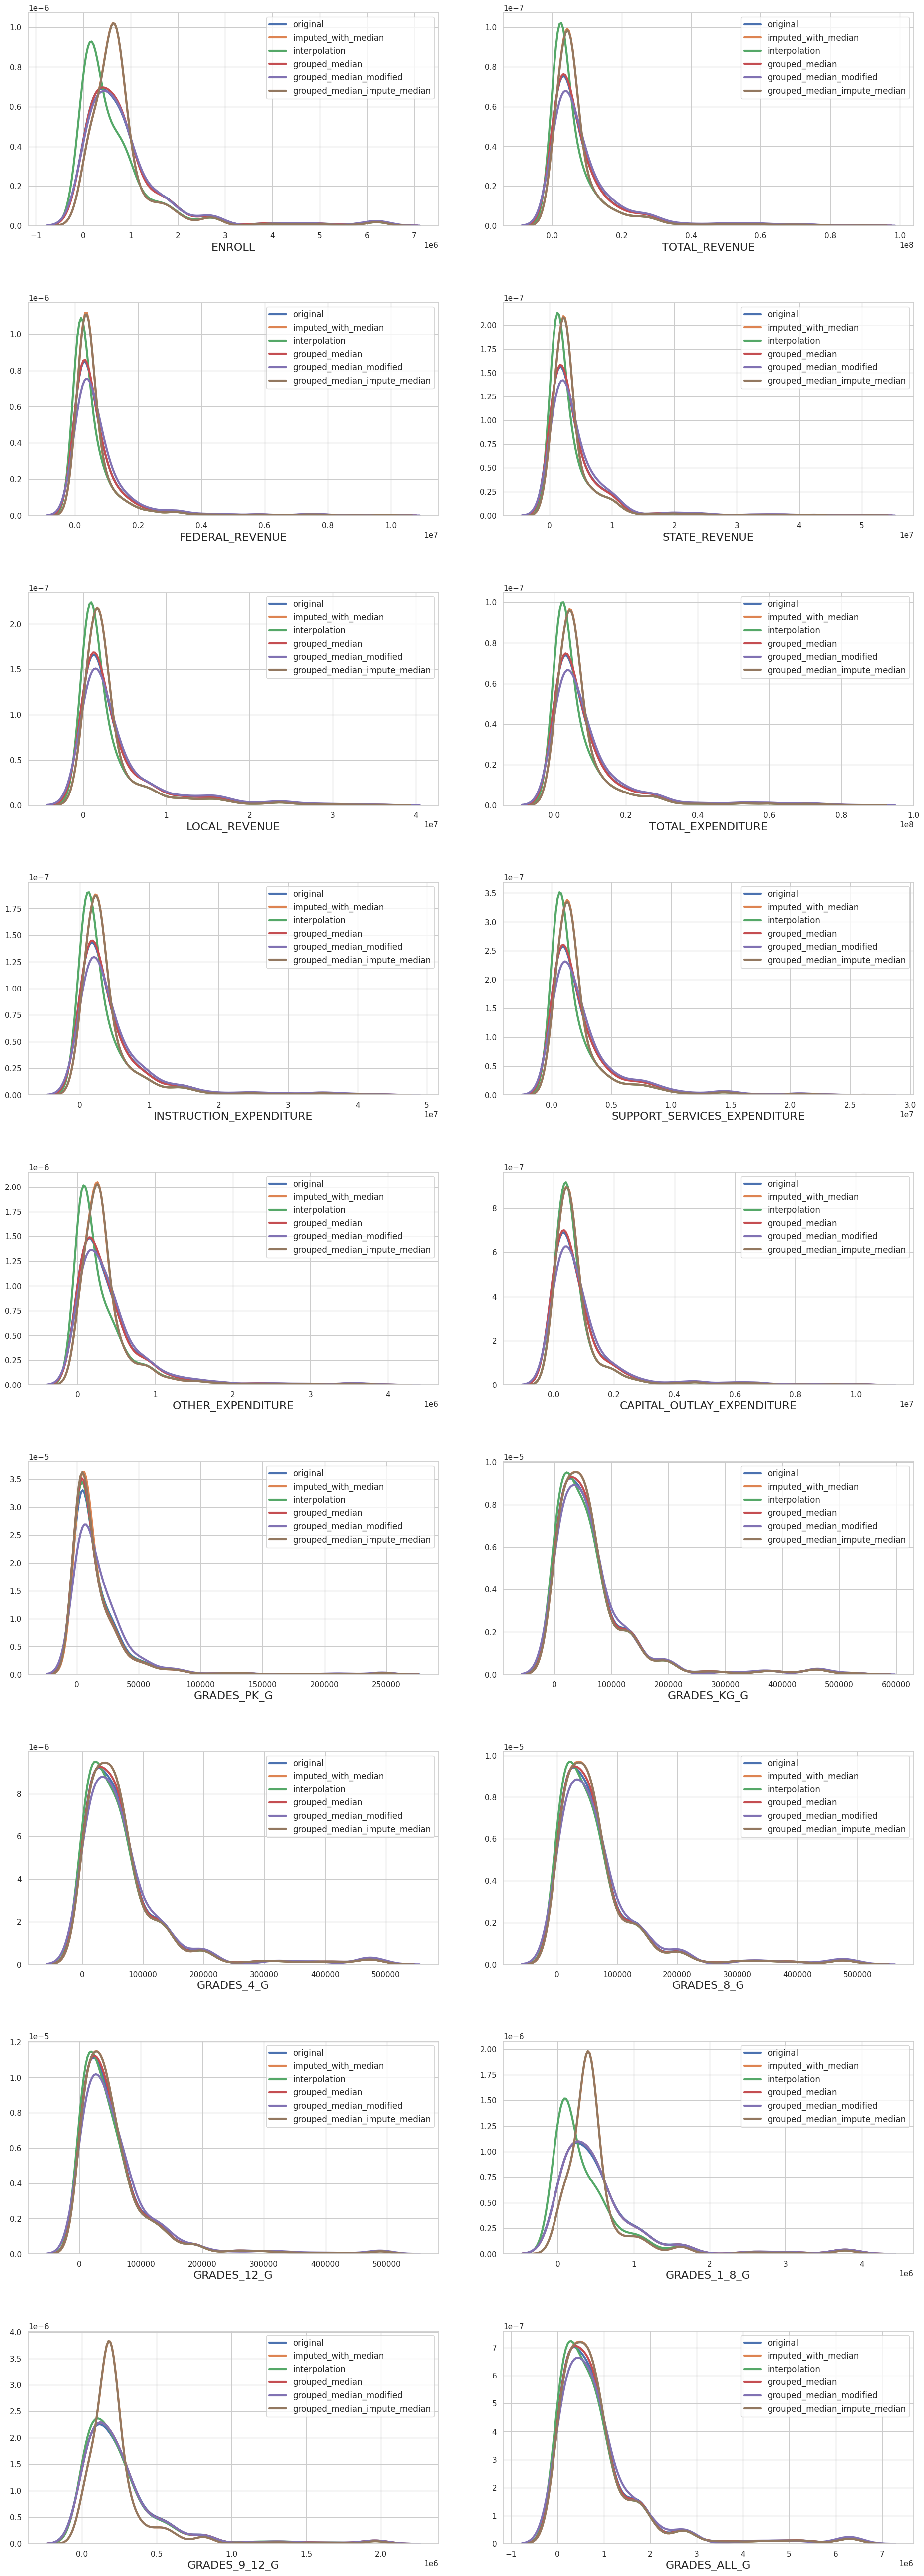

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

k=0
plt.figure(figsize=(20,70))

for col in df.columns:
  if col in df_datatype.index:
    k += 1
    plt.subplot(12,2,k)
    sns.kdeplot(df[col], label='original', linewidth=3)
    sns.kdeplot(df_impute_median[col], label='imputed_with_median', linewidth=3)
    sns.kdeplot(df_interpolate[col], label='interpolation', linewidth=3)
    sns.kdeplot(df_time_series[col], label='grouped_median', linewidth=3)
    sns.kdeplot(df_time_series_modified[col], label='grouped_median_modified', linewidth=3)
    sns.kdeplot(df_time_series_impute_median[col], label='grouped_median_impute_median', linewidth=3)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.legend(fontsize=12)

plt.tight_layout(pad=5.0)
plt.show()
